In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


# Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.exceptions import UndefinedMetricWarning
from  sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import RFE

from yellowbrick.text import TSNEVisualizer
from sklearn.manifold import TSNE
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, mutual_info_classif
from minisom import MiniSom
from sklearn.cluster import DBSCAN
from tqdm import tqdm
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Function conf_matrix
* To preview the confusion matrix and classification report

In [3]:
def conf_matrix(x, y, title, show_report=False):
    cm = confusion_matrix(x, y)
    plt.figure(figsize=(6, 4))

    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", cbar=False)
    plt.title(f'Confusion Matrix - {title} Data')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()
    if not show_report:
        print("F1 scores: ", f1_score(x, y))

    if show_report:
        report = classification_report(x, y)
        print("Classification Report:")
        print(report)
        plt.show()
    return f1_score(x, y)

# Read Data from CSV file

In [4]:
MCS_data=pd.read_csv("https://raw.githubusercontent.com/ahmedbadawy11/Machine-Learning-tasks/anas/main/MCSDatasetNEXTCONLab.csv")

In [5]:
MCS_data.head(10)

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
5,2,45.447747,-75.147951,2,15,59,30,20,5,47,0,140784,1
6,2,45.447790,-75.148303,2,16,9,30,10,5,47,0,140784,1
7,3,45.508896,-75.259807,2,12,27,30,30,4,43,0,243994,1
8,3,45.508748,-75.260652,2,12,37,30,20,4,43,0,243994,1
9,3,45.508082,-75.260380,2,12,47,30,10,4,43,0,243994,1


In [6]:
MCS_data.shape

(14484, 13)

# Part 2 (1) A

# Split the dataset into two parts as training data and test data
* the training data is  The values 0, 1 and 2 in column day
* test data is the value 3 in column day

In [7]:
MCS_data['Day'].value_counts()

Day
2    2483
1    2467
3    2460
5    2457
0    2305
4    2279
6      33
Name: count, dtype: int64

In [8]:
train_dataset = MCS_data[MCS_data['Day'].isin([0, 1, 2])]
test_dataset = MCS_data[MCS_data['Day'] == 3]

# Drop ID and Day Features from training and test data

In [9]:
train_dataset = train_dataset.drop(['ID', 'Day'], axis=1)
test_dataset = test_dataset.drop(['ID', 'Day'], axis=1)

In [10]:
train_dataset

,Latitude,Longitude,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,45.442142,-75.303369,4,13,40,40,9,91,0,131380,1
1,45.442154,-75.304366,4,23,40,30,9,91,0,131380,1
2,45.442104,-75.303963,4,33,40,20,9,91,0,121996,1
3,45.441868,-75.303577,4,43,40,10,9,91,0,121996,1
4,45.447727,-75.147722,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...
14479,45.445303,-75.165596,1,18,20,20,10,80,0,131397,1
14480,45.445574,-75.165168,1,28,20,10,10,80,0,131397,1
14481,45.436682,-75.152416,12,21,30,30,4,63,0,122015,1
14482,45.436978,-75.153278,12,31,30,20,4,63,0,122015,1


In [11]:
test_dataset

,Latitude,Longitude,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
16,45.410236,-75.208755,22,25,30,30,10,32,0,75088,1
17,45.409787,-75.208022,22,35,30,20,10,32,0,75088,1
18,45.409407,-75.207825,22,45,30,10,10,32,0,65704,1
26,45.544018,-75.146364,20,39,20,20,2,82,0,300312,1
27,45.544576,-75.146364,20,49,20,10,2,82,0,300312,1
...,...,...,...,...,...,...,...,...,...,...,...
14429,45.541816,-75.177356,4,36,60,10,9,43,0,300308,1
14445,45.461207,-75.209171,3,4,40,40,4,60,0,159544,1
14446,45.461241,-75.209067,3,14,40,30,4,60,0,159544,1
14447,45.461261,-75.209205,3,24,40,20,4,60,0,159544,1


In [12]:
MCS_data['Ligitimacy'].value_counts()

Ligitimacy
1    12587
0     1897
Name: count, dtype: int64

# train_dataset for x_train and y_train
# test_dataset for x_test and y_test

In [13]:
X_train = train_dataset.drop('Ligitimacy', axis=1)
y_train = train_dataset['Ligitimacy']

X_test = test_dataset.drop('Ligitimacy', axis=1)
y_test = test_dataset['Ligitimacy']

# Part 2 (1) B

# Function "Naive_Bayes_Models"
* this is user defined function whice apply Naive Bayes models

* It Takes 4 parameters Model_classifier , X__train , Y__train , X__test

* then path X__train and Y__train to fit function then path X__test to predict functoin to calculate classifier_predictions

In [14]:
def Naive_Bayes_Models(classifier,X__train,Y__train,X__test):
    classifier.fit(X__train, Y__train)
    classifier_predictions = classifier.predict(X__test)
    return classifier_predictions

# Function "knn_model"
* this is user defined function whice apply KNN model

* It Takes 4 parameters number of K , X__train , Y__train , X__test

* then path X__train and Y__train to fit function then path X__test to predict functoin to calculate y_test_pred

In [15]:
def knn_model(x_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(x_train, y_train)

    y_test_pred = knn.predict(X_test)
    return y_test_pred


# Run "Classifier_Models" Function using GaussianNB classifier

In [16]:
Gaussian_predictions=Naive_Bayes_Models(GaussianNB(),X_train,y_train,X_test)

# Display the confusion matrix for GaussianNB classifier and F1 scores

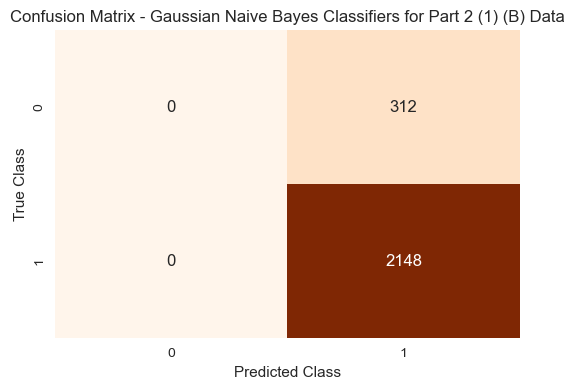

F1 scores:  0.9322916666666667


In [17]:
nb_baseline_f1= conf_matrix(y_test,Gaussian_predictions,"Gaussian Naive Bayes Classifiers for Part 2 (1) (B)")

# Run "knn_model" Function using k=2

In [18]:
y_test_pred_knn = knn_model(X_train, y_train, X_test, k=2)

# Display the confusion matrix for KNN classifier and F1 scores

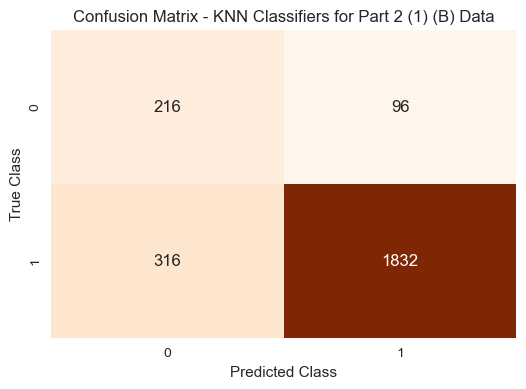

F1 scores:  0.8989205103042198


In [19]:
knn_baseline_f1=conf_matrix(y_test,y_test_pred_knn,"KNN Classifiers for Part 2 (1) (B)")

# Part 2 (1) C

In [20]:
def draw_TSNE(data, data_labels, title=None, labels=None, colors=None):
    # method-1
#     data = X  # change this for different plotting
#     data_labels = y  # change this for different plotting
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(data)

    # plot tsne for x_test and x_train
    classes = unique_labels(data_labels)
    target_ids = range(len(classes))
    plt.figure(figsize=(6, 5))
    colors = 'blue','r', 'g', 'b', 'c', 'm', 'k','y', 'orange', 'tomato', 'lime'
    for i, c, label in zip(target_ids, colors, classes):
        plt.scatter(X_2d[data_labels == i, 1], X_2d[data_labels == i, 0], c=c, label=label)
        # print(i)
        # print(data_labels)
        # print(X_2d[data_labels == i, 0])
    plt.legend()
    plt.title(f't-SNE Plot -{title}')
    plt.show()

In [21]:
# draw_TSNE(X_train,y_train,"Training Set")
# draw_TSNE(X_test,y_test,"Test Set")
def Perform_TSNE(X_Data_pca,Lable,Title=None):
    tsne = TSNE(n_components=2, random_state=0)
    X_train_tsne = tsne.fit_transform(X_Data_pca)
#     X_test_tsne = tsne.fit_transform(X_test_pca)


    plt.figure(figsize=(10, 6))
    plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=Lable, cmap="viridis")
    plt.title(f"t-SNE Visualization - {Title}")
    plt.colorbar()
    plt.show()


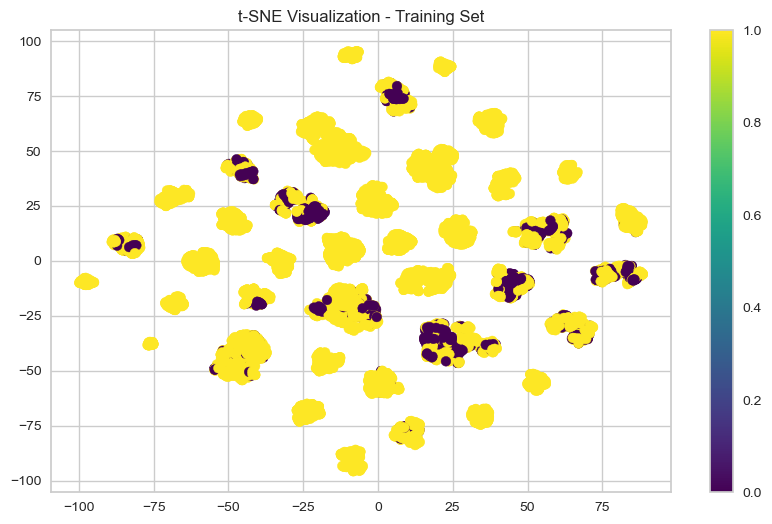

In [22]:
Perform_TSNE(X_train,y_train,"Training Set")

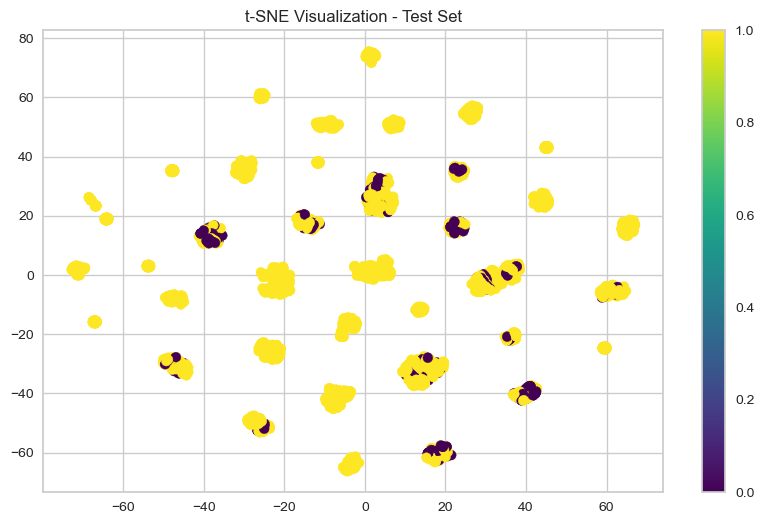

In [23]:
Perform_TSNE(X_test,y_test,"Test Set")

# Part 2 (2)  A

# Standardize the features

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA

In [25]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Perform Auto Encoder (AE)

In [26]:
input_dim = X_train_scaled.shape[1]
encoding_dim = int(input_dim / 2)

# Define the AE model architecture

In [27]:
def create_autoencoder_model(data,outputs):
    """
    :param data:
    :param outputs:
    :return:
    Create an autoencoder model
    """
    input_layer = Input(shape=(data.shape[1],))
    encoder = Dense(10, activation="relu")(input_layer)
    encoder = Dense(7, activation="relu")(encoder)
    encoder = Dense(5, activation="relu")(encoder)
    encoder = Dense(3, activation="relu")(encoder)
    encoder = Dense(outputs, activation="relu")(encoder)
    decoder = Dense(3, activation="relu")(encoder)
    decoder = Dense(5, activation="relu")(decoder)
    decoder = Dense(7, activation="relu")(decoder)
    decoder = Dense(10, activation="relu")(decoder)
    decoder = Dense(data.shape[1], activation="sigmoid")(decoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer="adam", loss="mse")
    autoencoder.fit(data, data, epochs=10, batch_size=32, verbose=0)
    encoder = Model(inputs=input_layer, outputs=encoder)
    return encoder.predict(data)


# Compile and fit the AE model

In [28]:
X_train_ae = create_autoencoder_model(X_train_scaled, encoding_dim)

X_test_ae = create_autoencoder_model(X_test_scaled, encoding_dim)


77/77 [==============================] - 0s 1ms/step


# Train and predict using KNN with PCA

In [29]:
pca_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]
pca_f1_scores = np.zeros((len(pca_components), 2))
for i, component in enumerate(pca_components):
    pca = PCA(n_components=component, random_state=0)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(X_train_pca, y_train)
    y_pred = knn_classifier.predict(X_test_pca)
    pca_f1_scores[i, 0] = component
    pca_f1_scores[i, 1] = f1_score(y_test, y_pred)
    print("KNN with PCA (n_components = {}): {}".format(component, pca_f1_scores[i, 1]))
    print(classification_report(y_test, y_pred))




KNN with PCA (n_components = 2): 0.9222727272727272
              precision    recall  f1-score   support

           0       0.43      0.29      0.34       312
           1       0.90      0.94      0.92      2148

    accuracy                           0.86      2460
   macro avg       0.66      0.61      0.63      2460
weighted avg       0.84      0.86      0.85      2460

KNN with PCA (n_components = 3): 0.9366736256089075
              precision    recall  f1-score   support

           0       0.57      0.54      0.55       312
           1       0.93      0.94      0.94      2148

    accuracy                           0.89      2460
   macro avg       0.75      0.74      0.74      2460
weighted avg       0.89      0.89      0.89      2460

KNN with PCA (n_components = 4): 0.9225850650833523
              precision    recall  f1-score   support

           0       0.44      0.32      0.37       312
           1       0.91      0.94      0.92      2148

    accuracy              

# Train and predict using  KNN  with AE

In [30]:
ae_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]
ae_f1_scores = np.zeros((len(ae_components), 2))
for i, component in enumerate(ae_components):
    X_train_ae = create_autoencoder_model(X_train_scaled, component)
    X_test_ae = create_autoencoder_model(X_test_scaled, component)
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(X_train_ae, y_train)
    y_pred = knn_classifier.predict(X_test_ae)
    ae_f1_scores[i, 0] = component
    ae_f1_scores[i, 1] = f1_score(y_test, y_pred)
    print("KNN with AE (n_components = {}): {}".format(component, ae_f1_scores[i, 1]))
    print(classification_report(y_test, y_pred))


77/77 [==============================] - 0s 1ms/step
KNN with AE (n_components = 2): 0.9322916666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.87      1.00      0.93      2148

    accuracy                           0.87      2460
   macro avg       0.44      0.50      0.47      2460
weighted avg       0.76      0.87      0.81      2460

77/77 [==============================] - 0s 1ms/step
KNN with AE (n_components = 3): 0.9130044843049328
              precision    recall  f1-score   support

           0       0.24      0.12      0.16       312
           1       0.88      0.95      0.91      2148

    accuracy                           0.84      2460
   macro avg       0.56      0.53      0.53      2460
weighted avg       0.80      0.84      0.82      2460

77/77 [==============================] - 0s 2ms/step
KNN with AE (n_components = 4): 0.9204320035265594
              precision    recall 

# Train and predict using Naive Bayes with PCA

In [31]:
pca_nb_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]
pca_nb_f1_scores = np.zeros((len(pca_nb_components), 2))
for i, component in enumerate(pca_nb_components):
    pca = PCA(n_components=component, random_state=0)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_pca, y_train)
    y_pred = nb_classifier.predict(X_test_pca)
    pca_nb_f1_scores[i, 0] = component
    pca_nb_f1_scores[i, 1] = f1_score(y_test, y_pred)
    print("Naive Bayes with PCA (n_components = {}): {}".format(component, pca_nb_f1_scores[i, 1]))
    print(classification_report(y_test, y_pred))





Naive Bayes with PCA (n_components = 2): 0.9322916666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.87      1.00      0.93      2148

    accuracy                           0.87      2460
   macro avg       0.44      0.50      0.47      2460
weighted avg       0.76      0.87      0.81      2460

Naive Bayes with PCA (n_components = 3): 0.9344919786096257
              precision    recall  f1-score   support

           0       0.57      0.22      0.32       312
           1       0.90      0.98      0.93      2148

    accuracy                           0.88      2460
   macro avg       0.74      0.60      0.63      2460
weighted avg       0.86      0.88      0.86      2460

Naive Bayes with PCA (n_components = 4): 0.9329472042771219
              precision    recall  f1-score   support

           0       0.55      0.21      0.30       312
           1       0.89      0.97      0.93      2148

  

# Train and predict using Naive Bayes with AE

In [32]:

ae_nb_components = [2, 3, 4, 5, 6, 7, 8, 9, 10]
ae_nb_f1_scores = np.zeros((len(ae_nb_components), 2))
for i, component in enumerate(ae_nb_components):
    X_train_ae = create_autoencoder_model(X_train_scaled, component)
    X_test_ae = create_autoencoder_model(X_test_scaled, component)
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_ae, y_train)
    y_pred = nb_classifier.predict(X_test_ae)
    ae_nb_f1_scores[i, 0] = component
    ae_nb_f1_scores[i, 1] = f1_score(y_test, y_pred)
    print("Naive Bayes with AE (n_components = {}): {}".format(component, ae_nb_f1_scores[i, 1]))
    print(classification_report(y_test, y_pred))

77/77 [==============================] - 0s 983us/step
Naive Bayes with AE (n_components = 2): 0.9322916666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.87      1.00      0.93      2148

    accuracy                           0.87      2460
   macro avg       0.44      0.50      0.47      2460
weighted avg       0.76      0.87      0.81      2460

77/77 [==============================] - 0s 913us/step
Naive Bayes with AE (n_components = 3): 0.8839880542154837
              precision    recall  f1-score   support

           0       0.12      0.10      0.11       312
           1       0.87      0.90      0.88      2148

    accuracy                           0.79      2460
   macro avg       0.50      0.50      0.50      2460
weighted avg       0.78      0.79      0.79      2460

77/77 [==============================] - 0s 1ms/step
Naive Bayes with AE (n_components = 4): 0.9322916666666667
      

# Function "Draw_POlt_No_of_components"
* this is user defined function whice apply plot

* It Takes 3 parameters KNN_f1_scores ,nb_f1_scores, Title

* then Draw plot "Number of Components"  as xlabel ,"F1 Score" as ylabel

In [33]:
def Draw_POlt_No_of_components(KNN_f1_scores,nb_f1_scores,Title=None):
    plt.figure(figsize=(10, 6))
    plt.plot(KNN_f1_scores[:, 0], KNN_f1_scores[:, 1], label="KNN")
    plt.plot(nb_f1_scores[:, 0], nb_f1_scores[:, 1], label="Naive Bayes")
    plt.xlabel("Number of Components")
    plt.ylabel("F1 Score")
    plt.title(f"{Title} - Number of Components vs F1 Score")
    plt.legend()
    plt.show()


# Plot the number of components vs F1 score for PCA for both knn and nb

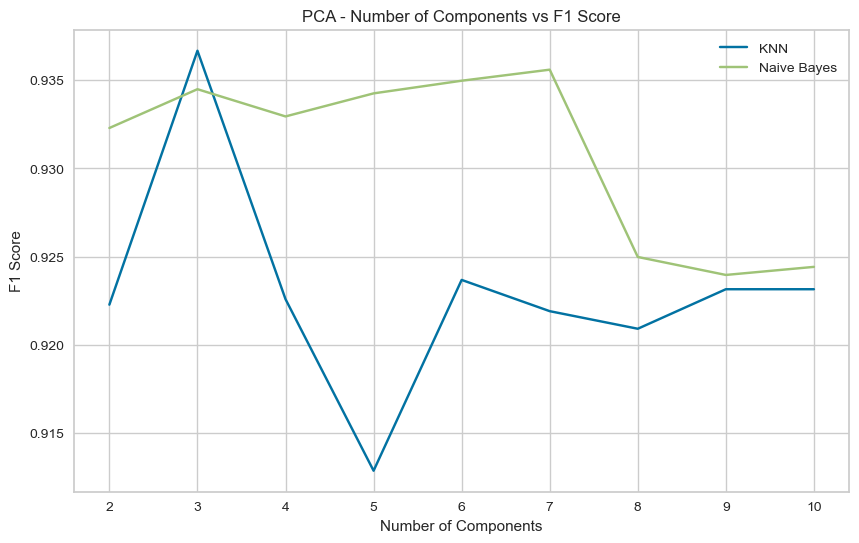

In [34]:
Draw_POlt_No_of_components(pca_f1_scores,pca_nb_f1_scores,"PCA")

# Plot the number of components vs F1 score for AE for both knn and nb

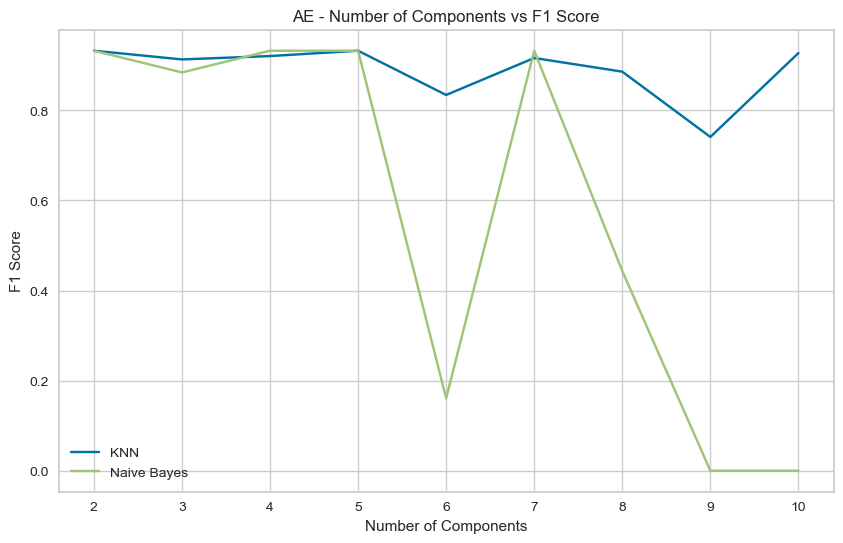

In [35]:
Draw_POlt_No_of_components(ae_f1_scores,ae_nb_f1_scores,"AE")

# Part 2 (2)  B

# Perform t-SNE on the best PCA-reduced data

# Plot t-SNE visualization for training set

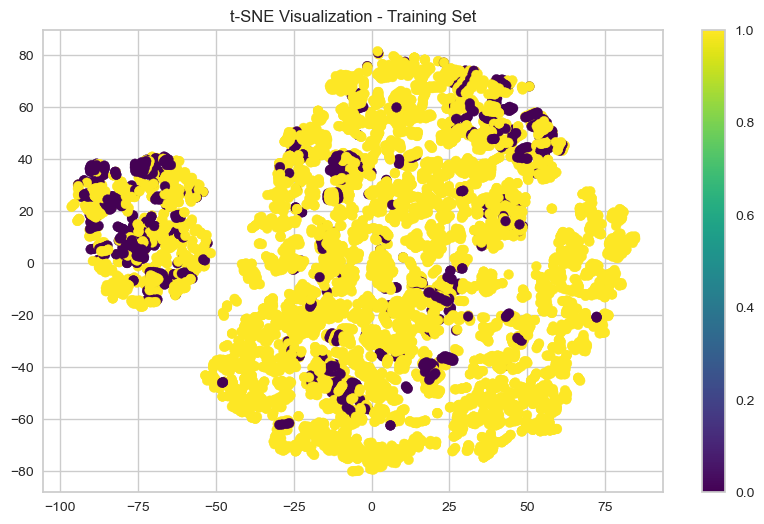

In [36]:
Perform_TSNE(X_train_pca,y_train,"Training Set")

# Plot t-SNE visualization for test set

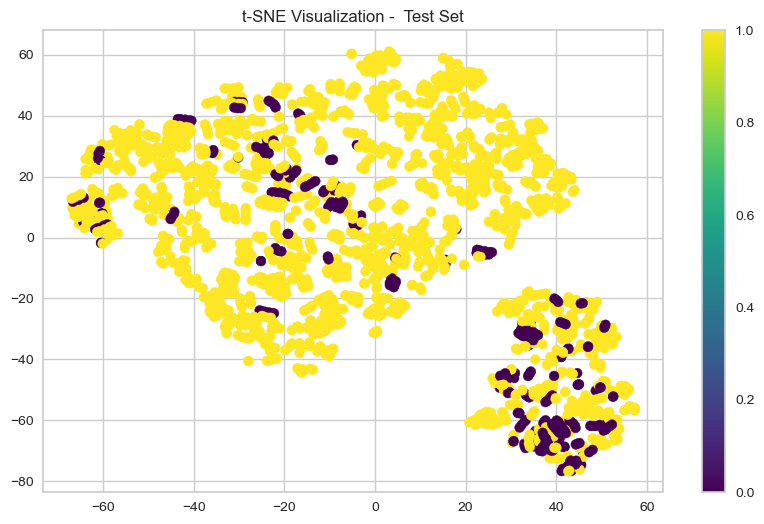

In [37]:
Perform_TSNE(X_test_pca,y_test," Test Set")

# Part 2 (3)  A

In [38]:
def select_feature(X_train, y_train, X_test, y_test, FSM, model):
    fs = FSM
    fs.fit(X_train, y_train)
    X_train_new = fs.transform(X_train)
    X_test_new = fs.transform(X_test)
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    # acc = accuracy_score(y_test, y_pred) * 100
    f1_knn = f1_score(y_test, y_pred)* 100

    return f1_knn

In [39]:
def apply_wrapper_RFECV_methods(X, y, estimator, k):
    # Recursive Feature Elimination with Cross-Validation
    rfecv = RFECV(estimator=estimator, step=1, cv=5)
    X_rfecv = rfecv.fit_transform(X, y)

    return X_rfecv

In [40]:
def apply_wrapper_feature_elimination_methods(X, y, estimator, k, forward=True):
    # Sequential Feature Selector
    sfs = SequentialFeatureSelector(estimator, n_features_to_select=k, direction='forward' if forward else 'backward')
    X_selected = sfs.fit_transform(X, y)

    return X_selected

In [41]:
acc_dict_INFOGAin_NB = {}
acc_dict_VAR_NB = {}

acc_dict_INFOGAin_KNN = {}
acc_dict_VAR_KNN = {}


In [42]:
for k in range(1, len(X_train.columns) + 1):

    # Filter method: Information Gain
    fsm = SelectKBest(score_func=mutual_info_classif, k=k)
    # Variance Threshold
    var_threshold = VarianceThreshold(threshold=0.01)
    # X_var_threshold = var_threshold.fit_transform(X)

    # Naive Bayes classifier
    nb_classifier = GaussianNB()

    acc_InfoGainNB = select_feature(X_train, y_train, X_test, y_test, fsm, nb_classifier)
    acc_VAR_NB = select_feature(X_train, y_train, X_test, y_test, var_threshold, nb_classifier)

    acc_dict_INFOGAin_NB[k] = acc_InfoGainNB
    acc_dict_VAR_NB[k] = acc_VAR_NB


    # K-Nearest Neighbors classifier
    knn_classifier = KNeighborsClassifier()

    acc_InfoGainKNN = select_feature(X_train, y_train, X_test, y_test, fsm, knn_classifier)
    acc_VAR_KNN = select_feature(X_train, y_train, X_test, y_test, var_threshold, knn_classifier)

    acc_dict_INFOGAin_KNN[k] = acc_InfoGainKNN
    acc_dict_VAR_KNN[k] = acc_VAR_KNN

In [43]:
def Draw_plots(acc_list, Title=None):
    fig = plt.figure()  # Create a new figure
    plt.plot(*zip(*sorted(acc_list.items())))
    # Title = "Feature Selection with Information Gain Method"
    plt.title(Title, fontsize=16)
    plt.xlabel("Number of Features", fontsize=16)
    plt.ylabel("F1 Score (%)", fontsize=16)
    plt.show()
    print("Maximum accuracy:", max(acc_list.values()))
    print("Best number of features:", max(acc_list, key=acc_list.get))
    plt.show()
    # plt.close(fig)

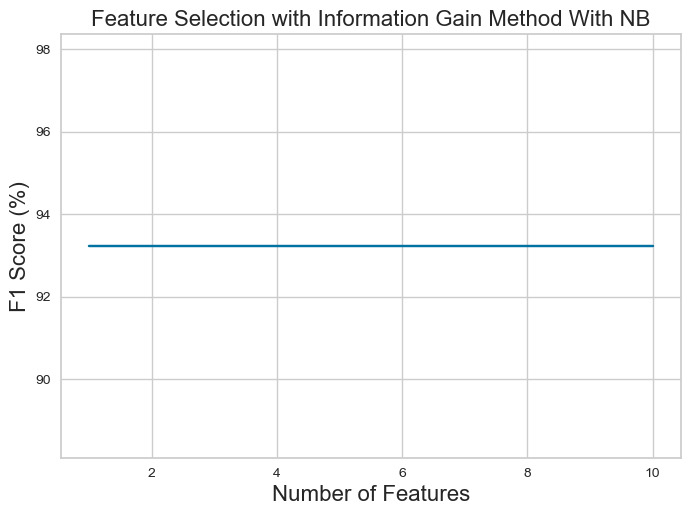

Maximum accuracy: 93.22916666666667
Best number of features: 1


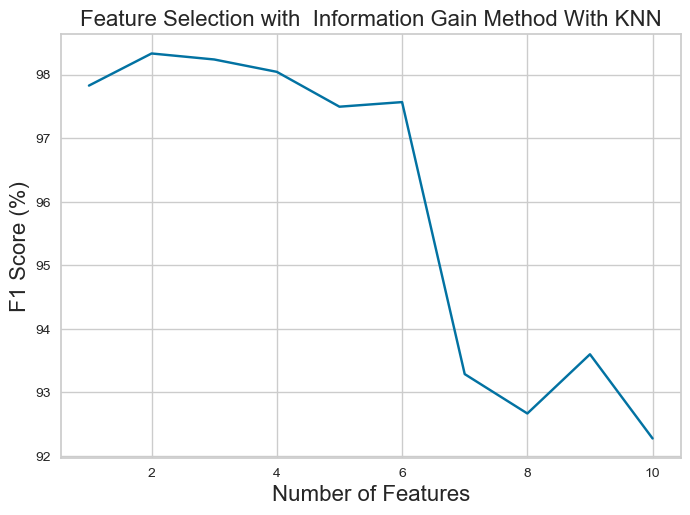

Maximum accuracy: 98.33684703677676
Best number of features: 2


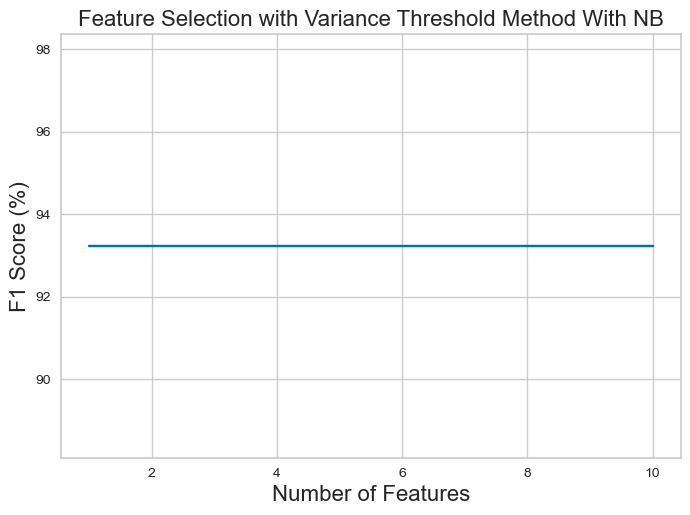

Maximum accuracy: 93.22916666666667
Best number of features: 1


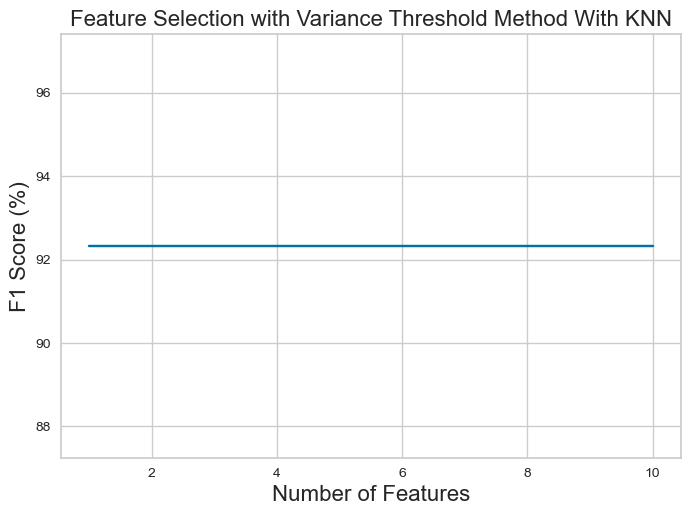

Maximum accuracy: 92.32552747507535
Best number of features: 1


In [44]:
Draw_plots(acc_dict_INFOGAin_NB,"Feature Selection with Information Gain Method With NB")
Draw_plots(acc_dict_INFOGAin_KNN,"Feature Selection with  Information Gain Method With KNN")

Draw_plots(acc_dict_VAR_NB,"Feature Selection with Variance Threshold Method With NB")
Draw_plots(acc_dict_VAR_KNN,"Feature Selection with Variance Threshold Method With KNN")

# Part 2 (3)  B

## Function forward_backward_feature()
* This function applies wrapper methods to different models

In [45]:
num_features = np.arange(1, 10)
def forward_backward_feature(estimator, X_train, y_train, X_test, y_test,dr ="forward"):

    accuracies = []

    for k in num_features:
        # Sequential Feature Selector
        sfs = SequentialFeatureSelector(estimator, n_features_to_select=k,direction=dr)
        X_selected = sfs.fit_transform(X_train, y_train)

        # Train a model using the selected features
        estimator.fit(X_selected, y_train)
        X_test_selected = sfs.transform(X_test)
        predictions = estimator.predict(X_test_selected)

        # Calculate the accuracy
        accuracy = f1_score(y_test, predictions)
        accuracies.append(accuracy)

    return accuracies

## Function rfe_feature()
* This function applies recursion feature elemination to different models

In [46]:
def compute_permutation_importances(classifier, X, y, scoring='f1', n_repeats=10, random_state=0):
    result = permutation_importance(classifier, X, y, scoring=scoring, n_repeats=n_repeats, random_state=random_state)
    return np.array(result.importances_mean)
min_features = 2
max_features = X_train.shape[1]

def rfe_feature(estimator, X_train, y_train, X_test, y_test):
  rfe_f1_scores = []
  for num_features in range(min_features, max_features+1):
    classifier_rfe = estimator
    classifier_rfe.fit(X_train.iloc[:, :num_features], y_train)
    permutation_importances = compute_permutation_importances(classifier_rfe, X_test.iloc[:, :num_features], y_test)
    classifier = estimator
    rfe = RFE(estimator=classifier, n_features_to_select=num_features, importance_getter=lambda _: permutation_importances)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    classifier.fit(X_train_rfe, y_train)
    predictions = classifier.predict(X_test_rfe)
    score = f1_score(y_test, predictions)
    rfe_f1_scores.append(score)
  return rfe_f1_scores


## Apply wrapper method  (Forward Feature Elimination) with KNN

In [47]:
accuracies_knn_fs = forward_backward_feature(KNeighborsClassifier(), X_train, y_train, X_test, y_test)
print(f'max score knn_fs {max(accuracies_knn_fs)}')

max score knn_fs 0.9837990138530172


## Apply wrapper method  (Forward Feature Elimination) with Naive bayse

In [48]:
accuracies_nb_fs = forward_backward_feature(GaussianNB(), X_train, y_train, X_test, y_test)
print(f'max score nb_fs {max(accuracies_nb_fs)}')

max score nb_fs 0.9324618736383443


## Apply wrapper method  (Recursoin Feature Elimination) with KNN

In [49]:
accuracies_nb_rfe = rfe_feature(GaussianNB(), X_train, y_train, X_test, y_test)
print(f'max score nb_rfe {max(accuracies_nb_rfe)}')

max score nb_rfe 0.9322916666666667


In [50]:
accuracies_knn_rfe = rfe_feature(KNeighborsClassifier(), X_train, y_train, X_test, y_test)
print(f'max score knn_rfe {max(accuracies_knn_rfe)}')

max score knn_rfe 0.9833684703677676


In [51]:
# accuracies_knn_bs = forward_backward_feature(KNeighborsClassifier(), X_train, y_train, X_test, y_test,dr="backward")

## Apply wrapper method  (Recursoin Feature Elimination) with Naive bayse

In [52]:
# accuracies_nb_bs = forward_backward_feature(GaussianNB(), X_train, y_train, X_test, y_test,dr="backward")

## function plot_num_features_vs_accuracy()
* To plot the accuarcy with each number of feature


In [53]:
def plot_num_features_vs_accuracy(accuracies, baseline_accuracy,name_estimator ):
    plt.plot(num_features, accuracies, marker='o')
    plt.axhline(y=baseline_accuracy, color='r', linestyle='--', label='Baseline')
    plt.xlabel('Number of Features')
    plt.ylabel("F1 Score")
    plt.title(f'{name_estimator}')
    plt.legend()
    plt.show()



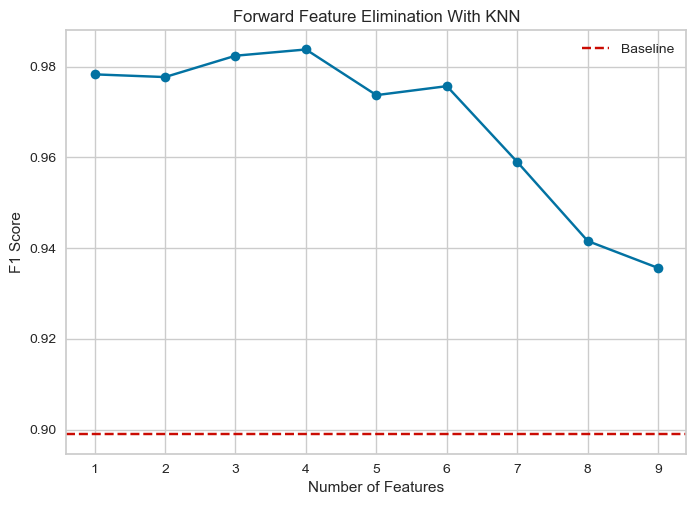

In [54]:
plot_num_features_vs_accuracy(accuracies_knn_fs,knn_baseline_f1,"Forward Feature Elimination With KNN")

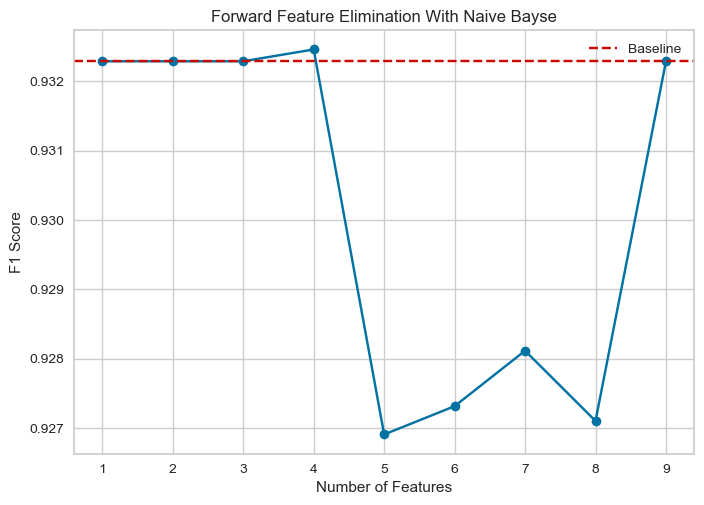

In [55]:
plot_num_features_vs_accuracy(accuracies_nb_fs,nb_baseline_f1,"Forward Feature Elimination With Naive Bayse")


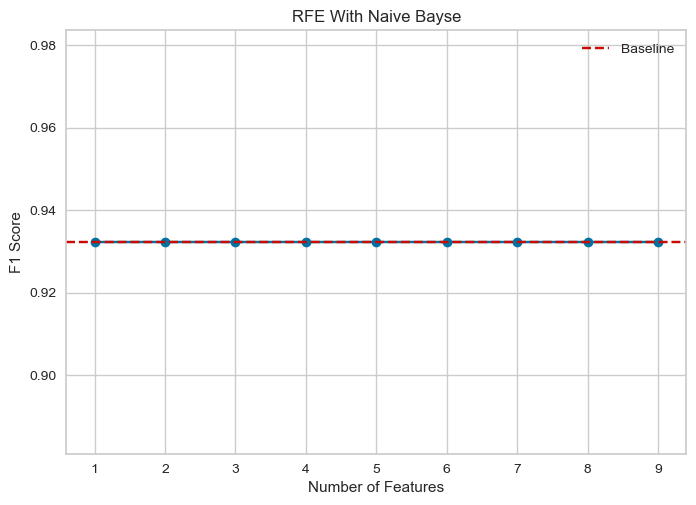

In [56]:
plot_num_features_vs_accuracy(accuracies_nb_rfe,nb_baseline_f1,"RFE With Naive Bayse")

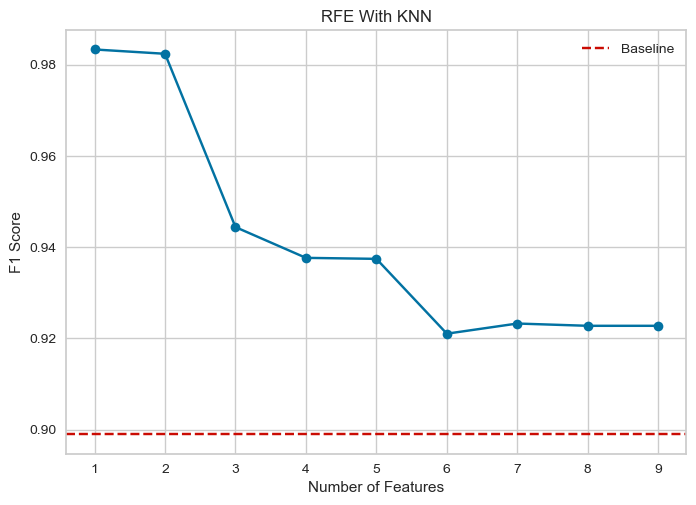

In [57]:
plot_num_features_vs_accuracy(accuracies_knn_rfe,knn_baseline_f1,"RFE With KNN")

In [58]:
# plot_num_features_vs_accuracy(accuracies_nb_bs,nb_baseline_f1,"Backward Feature Elimination With Naive Bayse")

In [59]:
# plot_num_features_vs_accuracy(accuracies_knn_bs,nb_baseline_f1,"Backward Feature Elimination With KNN")

## Compaire with each accuracy to get the best number of feature

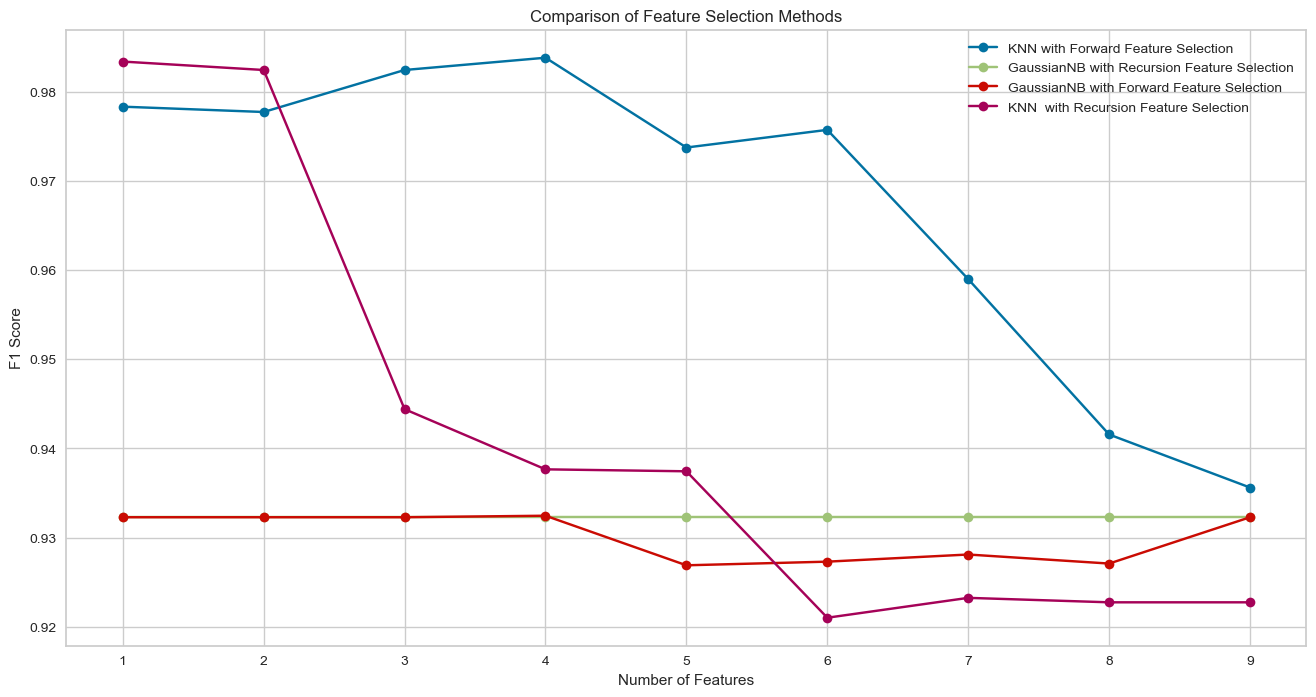

In [60]:


plt.figure(figsize=(16, 8))
plt.plot(num_features, accuracies_knn_fs, marker='o', label='KNN with Forward Feature Selection')
plt.plot(num_features, accuracies_nb_rfe, marker='o', label='GaussianNB with Recursion Feature Selection')
plt.plot(num_features, accuracies_nb_fs, marker='o', label='GaussianNB with Forward Feature Selection')
plt.plot(num_features, accuracies_knn_rfe, marker='o', label='KNN  with Recursion Feature Selection')

# plt.plot(num_features, list(acc_dict_INFOGAin_KNN.values())[:9], marker='*', label='KNN with Information Gain ')
# plt.plot(num_features, list(acc_dict_INFOGAin_NB.values())[:9], marker='*', label='GaussianNB with Information Gain')
# plt.plot(num_features, list(acc_dict_VAR_NB.values())[:9], marker='*', label='GaussianNB with Variance Threshold')
# plt.plot(num_features, list(acc_dict_VAR_KNN.values())[:9], marker='*', label='KNN  with Variance Threshold')

plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('Comparison of Feature Selection Methods')
plt.legend()
plt.grid(True)
plt.show()



#Best method is Wrapper (Forward feature Elimination)

# Part 2 (3)  C

## Draw Tsne when number of feature is four with forward selection

In [61]:
sfs = SequentialFeatureSelector(KNeighborsClassifier(), n_features_to_select=4)
X_selected = sfs.fit_transform(X_train, y_train)

KNeighborsClassifier().fit(X_selected, y_train)
X_test_selected = sfs.transform(X_test)



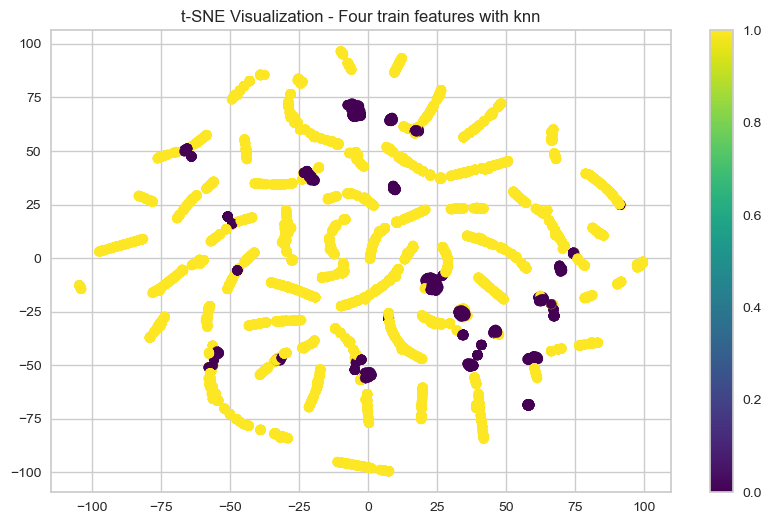

In [62]:
Perform_TSNE(X_selected,y_train,"Four train features with knn")

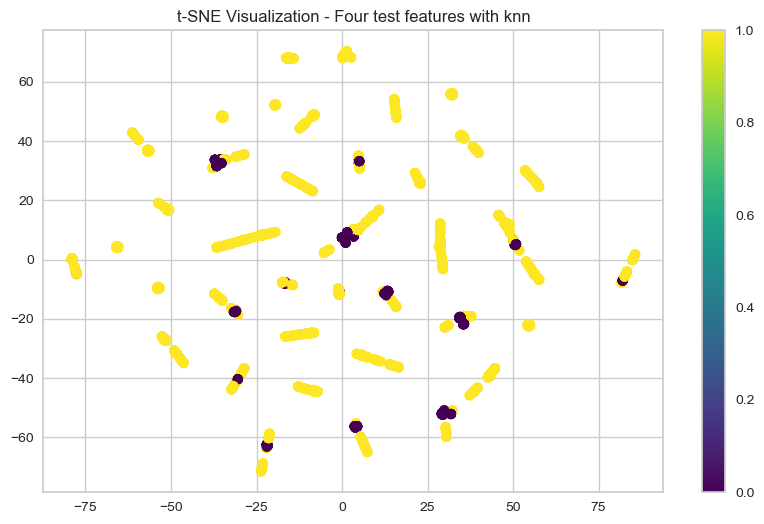

In [63]:
Perform_TSNE(X_test_selected,y_test,"Four test features with knn")

# Part 2 (4)  A

# Function "plot_No_cluster_Vs_Total_Legitimate"
* this is user defined function whice apply plot number of clusters Vs Total Legitimate-only Members 

* It Takes 3 parameters keys , values , Title

* then plot Number of Clusters vs. Total Legitimate-only Members for each clustering model

In [64]:
def plot_No_cluster_Vs_Total_Legitimate(keys,values,Title=None):
    for i in range(len(keys)):
        plt.scatter(keys[i], values[i], color='blue', marker='o')
    plt.plot(keys, values)
    plt.xlabel("number of clusters")
    plt.ylabel("Total Legitimate-only Members")
    plt.title(f"Number of Clusters vs. Total Legitimate-only Members {Title}")
    plt.show()

# Function "clustering_Kmeans"
* this is user defined function whice apply KMeans Model

* It Takes 2 parameters dataset ,Cluster_NUM_list

* then path X to fit function then  get labels   
* then get the true lable for each cluster [0,1]
* then get only legitimate member and count them for each number of K in list Cluster_NUM_list = [8, 12, 16, 20, 32]

In [65]:
def clustering_Kmeans(dataset, Cluster_NUM_list):
    Our_data = dataset[['Latitude', 'Longitude','Ligitimacy']]
    X=Our_data.iloc[:, :-1].values  
    y_true = Our_data.iloc[:, -1].astype(int).values  
    
    cluster_labels = {}
    cluster_labels_legitimate_only  = {}
    

    for k in Cluster_NUM_list:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X) 

        y_pred = kmeans.labels_

        for cluster in range(k):
            cluster_indices = np.where(y_pred == cluster)[0]
            if cluster_indices.size > 0:  
                labels_in_cluster = y_true[cluster_indices]
                label_counts = np.bincount(labels_in_cluster)
                most_Repeat_label = label_counts.argmax()
                cluster_labels[(k, cluster)] = {
                    'True Label': most_Repeat_label,
                    'Counts for pair of lable': label_counts
                }
                
                if(label_counts[0]==0):
                    cluster_labels_legitimate_only[(k, cluster)] = {
                    'legitimate_only': label_counts[1]
                   
                }
    sum_dict_temp = {}
    for (k, cluster), info in cluster_labels_legitimate_only.items():
        if k in sum_dict_temp:
            sum_dict_temp[k] += info['legitimate_only']
        else:
            sum_dict_temp[k] = info['legitimate_only']

    print("Pair of Num Of cluster and Count",sum_dict_temp)
    keys = list(sum_dict_temp.keys())
    values = list(sum_dict_temp.values())       

    return keys,values


In [66]:
Cluster_NUM_list = [8, 12, 16, 20, 32]

# Run  clustering_Kmeans using train Dataset 

In [67]:
keys,values = clustering_Kmeans(train_dataset, Cluster_NUM_list)

Pair of Num Of cluster and Count {8: 1573, 12: 2679, 16: 3420, 20: 3965, 32: 4740}


# Display the  Number of Clusters vs. Total Legitimate-only Members Kmeans (train Dataset)

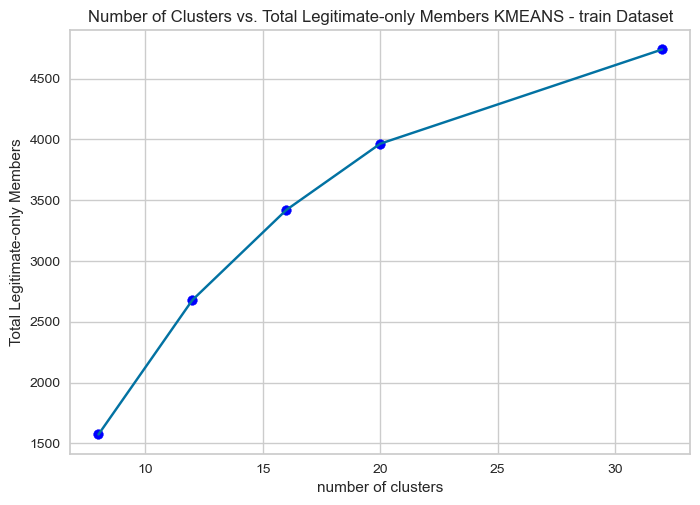

In [68]:
plot_No_cluster_Vs_Total_Legitimate(keys,values,"KMEANS - train Dataset")

# Run  clustering_Kmeans using Test Dataset 

In [69]:
keys,values = clustering_Kmeans(test_dataset, Cluster_NUM_list)

Pair of Num Of cluster and Count {8: 497, 12: 978, 16: 1179, 20: 1376, 32: 1713}


# Display the  Number of Clusters vs. Total Legitimate-only Members Kmeans (Test Dataset)

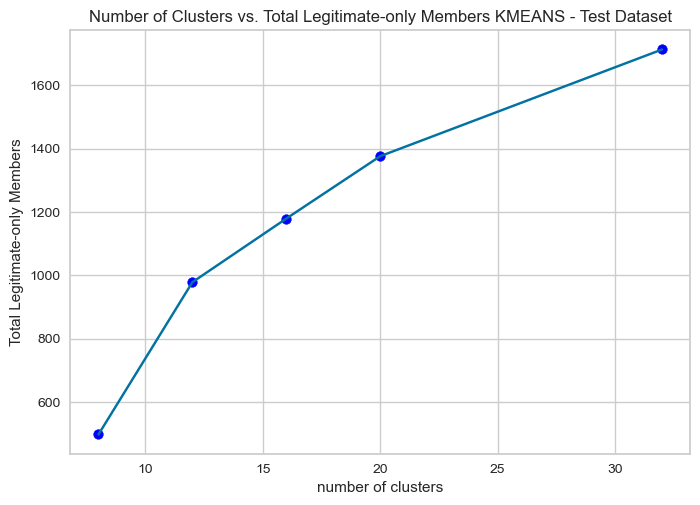

In [70]:
plot_No_cluster_Vs_Total_Legitimate(keys,values,"KMEANS - Test Dataset")

# Part 2 (4)  B

# Function "clustering_SOFM"
* this is user defined function whice apply MiniSom Model

* It Takes 2 parameters dataset ,Cluster_NUM_list

* then path X to winner function to Get the closest cluster for each sample   
* then get the true lable for each cluster [0,1]
* then get only legitimate member and count them for each number of K in list Cluster_NUM_list = [8, 12, 16, 20, 32]

In [71]:
def clustering_SOFM(dataset, Cluster_NUM_list):
    Our_data = dataset[['Latitude', 'Longitude','Ligitimacy']]
    X = Our_data.iloc[:, :-1].values  
    y_true = Our_data.iloc[:, -1].astype(int).values  
    
    cluster_labels = {}
    cluster_labels_legitimate_only = {}
    
    for k in Cluster_NUM_list:
        som = MiniSom(k, 1, X.shape[1], sigma=0.5, learning_rate=0.5,random_seed=42)
        # Initialize the weights using random samples
        som.random_weights_init(X)
        # Train the model
        som.train_random(X, num_iteration=100)
        # Get the closest cluster for each sample
        y_pred = np.array([som.winner(x) for x in X])

        for cluster in range(k):
            cluster_indices = np.where(y_pred == cluster)[0]
            if cluster_indices.size > 0: 
                labels_in_cluster = y_true[cluster_indices]
                label_counts = np.bincount(labels_in_cluster)
                most_Repeat_label = label_counts.argmax()
                cluster_labels[(k, cluster)] = {
                    'True Label': most_Repeat_label,
                    'Counts for pair of lable': label_counts
                }
                if label_counts[0] == 0:
                    cluster_labels_legitimate_only[(k, cluster)] = {
                        'legitimate_only': label_counts[1]
                    }
    
    sum_dict_temp = {}
    for (k, cluster), info in cluster_labels_legitimate_only.items():
        if k in sum_dict_temp:
            sum_dict_temp[k] += info['legitimate_only']
        else:
            sum_dict_temp[k] = info['legitimate_only']

    print("Pair of Num Of cluster and Count",sum_dict_temp)
    keys = list(sum_dict_temp.keys())
    values = list(sum_dict_temp.values())  
                        
    return keys,values


# Run  clustering_SOFM using train Dataset 

In [72]:
keys_SOFM,values_SOFM= clustering_SOFM(train_dataset, Cluster_NUM_list)

Pair of Num Of cluster and Count {8: 1457, 12: 1595, 16: 2118, 20: 2651, 32: 4416}


# Display the  Number of Clusters vs. Total Legitimate-only Members SOFM (train Dataset)

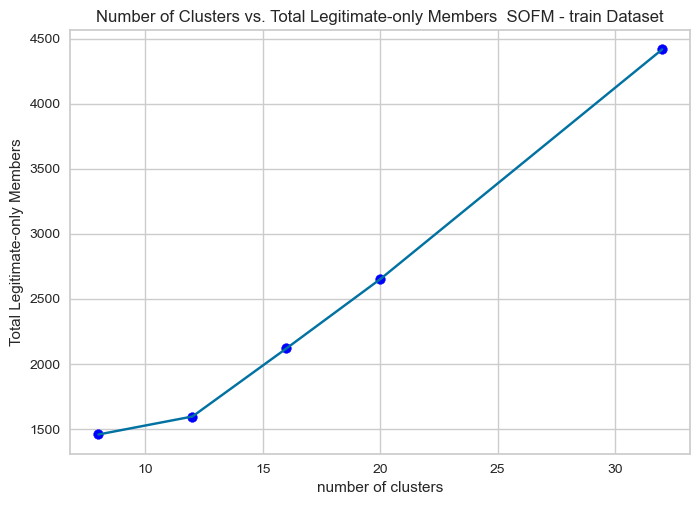

In [73]:
plot_No_cluster_Vs_Total_Legitimate(keys_SOFM,values_SOFM," SOFM - train Dataset")

# Run  clustering_SOFM using Test Dataset 

In [74]:
keys_SOFM,values_SOFM= clustering_SOFM(test_dataset, Cluster_NUM_list)

Pair of Num Of cluster and Count {12: 724, 16: 591, 20: 797, 32: 1387}


# Display the  Number of Clusters vs. Total Legitimate-only Members SOFM (Test Dataset)

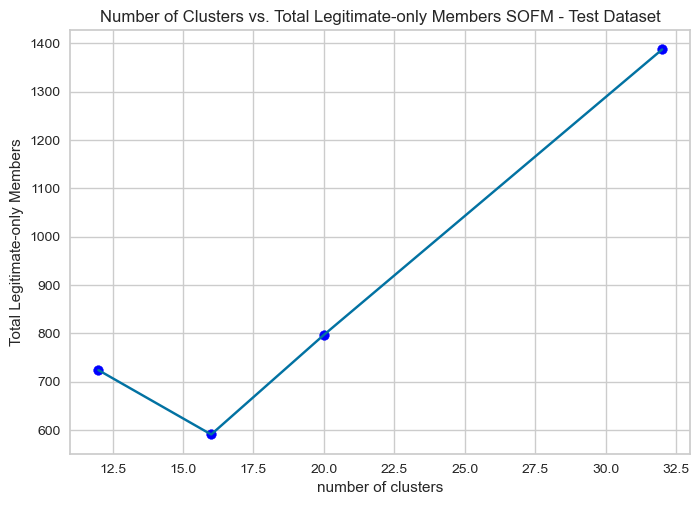

In [75]:
plot_No_cluster_Vs_Total_Legitimate(keys_SOFM,values_SOFM,"SOFM - Test Dataset")

# Part 2 (4)  B

# Try to find the eps and min_samples that obtain  this Number of Clusters
# [8, 12, 16, 20, 32]

In [76]:
Our_data = train_dataset[['Latitude', 'Longitude', 'Ligitimacy']]
X = Our_data.iloc[:, :-1].values
y_true = Our_data.iloc[:, -1].astype(int).values
num_clusters = [8, 12, 16, 20, 32]
epsList, msList,clusterList = [], [], []
# tqdm [0.002,0.003,0.001,0.01]

# [0.002,0.002,0.002,0.002,0.01]
# [16,19,20,22,2]
for eps in [0.002,0.003,0.001,0.01]:
    for ms in range(2,32):
        model = DBSCAN(eps=eps, min_samples=ms)
        model.fit(X)
        predLabels = model.fit_predict(X)
        labels = model.labels_    
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)            
        if n_clusters > 1 and n_clusters in num_clusters:
            epsList.append(eps)
            msList.append(ms)
            clusterList.append(n_clusters)
            

print("epsList",epsList)
print("msList",msList)
print("clusterList",clusterList)

epsList [0.002, 0.002, 0.002, 0.003, 0.001, 0.01]
msList [19, 20, 22, 28, 28, 2]
clusterList [20, 16, 12, 20, 8, 8]


# DBSCAN

# Function "clustering_DBSCAN"
* this is user defined function whice apply DBSCAN Model

* It Takes 1 parameters dataset 

* then path X to fit function to fit the model 
* then get the true lable for each cluster [0,1]
* then get only legitimate member and count them for each number of K in list Cluster_NUM_list = [8, 12, 16, 20, 32]

In [77]:
def clustering_DBSCAN(dataset):
    Our_data = dataset[['Latitude', 'Longitude','Ligitimacy']]
    X = Our_data.iloc[:, :-1].values  
    y_true = Our_data.iloc[:, -1].astype(int).values  
    
    cluster_labels = {}
    cluster_labels_legitimate_only = {}
    
    for midpoint, epsilon in [(16, 0.002), (19, 0.002), (20, 0.002), (22,0.002), (2, 0.01)]:
        dbscan = DBSCAN(eps=epsilon, min_samples=midpoint, metric='euclidean')

        # Fit the model to the data
        dbscan.fit(X)

        # Get the predicted cluster labels
        y_pred = dbscan.labels_
        n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)            

        
        for cluster in range(n_clusters):
            cluster_indices = np.where(y_pred == cluster)[0]
            if cluster_indices.size > 0:  
                labels_in_cluster = y_true[cluster_indices]
                label_counts = np.bincount(labels_in_cluster)
                most_Repeat_label = label_counts.argmax()
                cluster_labels[(n_clusters, cluster)] = {
                    'True Label': most_Repeat_label,
                    'Counts for pair of lable': label_counts
                }
                
                if(label_counts[0]==0):
                    cluster_labels_legitimate_only[(n_clusters, cluster)] = {
                    'legitimate_only': label_counts[1]
                   
                }
    sum_dict_temp = {}
    for (k, cluster), info in cluster_labels_legitimate_only.items():
        if k in sum_dict_temp:
            sum_dict_temp[k] += info['legitimate_only']
        else:
            sum_dict_temp[k] = info['legitimate_only']

    print("Pair of Num Of cluster and Count",sum_dict_temp)
    keys = list(sum_dict_temp.keys())
    values = list(sum_dict_temp.values())       

    return keys,values


# Run  clustering_DBSCAN using train Dataset 

In [78]:
keys_DBSCAN,values_DBSCAN= clustering_DBSCAN(train_dataset)

Pair of Num Of cluster and Count {33: 480, 20: 225, 16: 147, 12: 58, 8: 33}


# Display the  Number of Clusters vs. Total Legitimate-only Members DBSCAN (train Dataset)

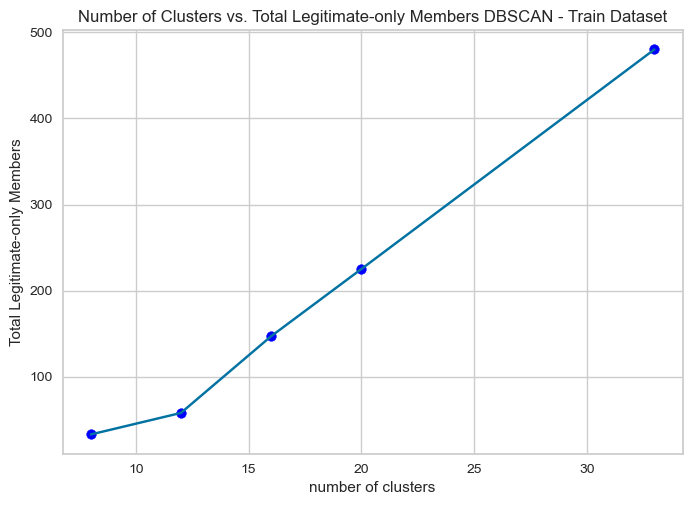

In [79]:
plot_No_cluster_Vs_Total_Legitimate(keys_DBSCAN,values_DBSCAN,"DBSCAN - Train Dataset")

# Run  clustering_DBSCAN using Test Dataset 

In [80]:
keys_DBSCAN,values_DBSCAN= clustering_DBSCAN(test_dataset)

Pair of Num Of cluster and Count {9: 16, 34: 237}


# Display the  Number of Clusters vs. Total Legitimate-only Members DBSCAN (Test Dataset)

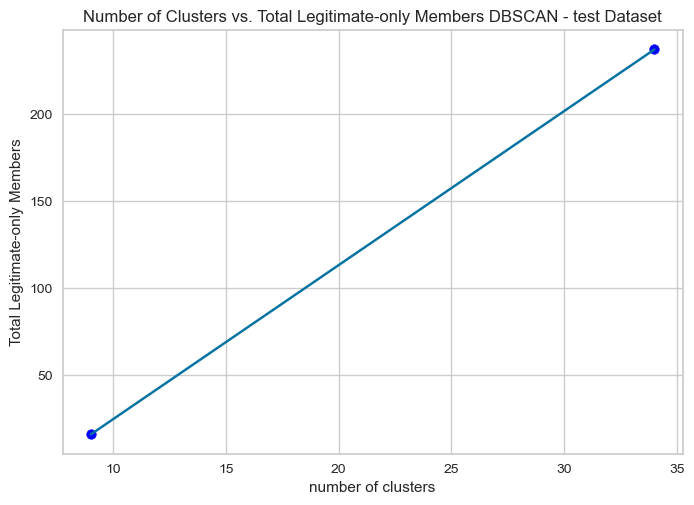

In [81]:
plot_No_cluster_Vs_Total_Legitimate(keys_DBSCAN,values_DBSCAN,"DBSCAN - test Dataset")